# Prediction of Customer Buying Personal Loan

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Data Extraction 

In [2]:
loan = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
loan.shape

(5000, 14)

In [4]:
loan.head()

ID  Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
loan.describe()

ID          Age   Experience       Income      ZIP_Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Selection Data 

In [9]:
df = loan[['Age', 'Personal_Loan']]
df.head()

Age  Personal_Loan
0   25              0
1   45              0
2   39              0
3   35              0
4   35              0

## Naive Bayes Model 

In [40]:
#split data
X = df.drop('Personal_Loan', axis = 1)
y = df['Personal_Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3500, 1)
(3500,)
(1500, 1)
(1500,)


In [41]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_predict = nb.predict(X_test)
print(nb)
print(y_predict)

GaussianNB()
[0 0 0 ... 0 0 0]


In [42]:
#accuracy score
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy Score : ', accuracy)
print('Percentage : ', int(accuracy * 100), '%')

Accuracy Score :  0.908
Percentage :  90 %


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

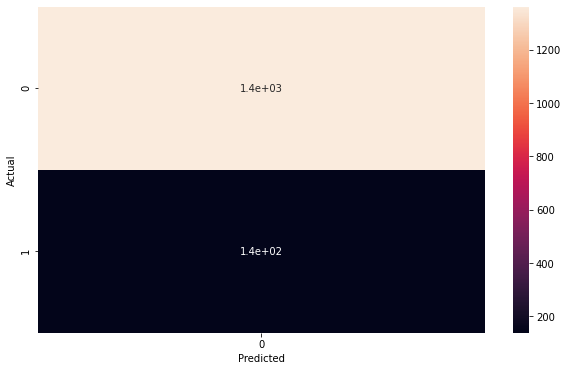

In [45]:
#confusion matrix
plt.figure(figsize=(10,6))
confusion_matrix = pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [46]:
#classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1362
           1       0.00      0.00      0.00       138

    accuracy                           0.91      1500
   macro avg       0.45      0.50      0.48      1500
weighted avg       0.82      0.91      0.86      1500



c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c:\users\bayu\opencv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


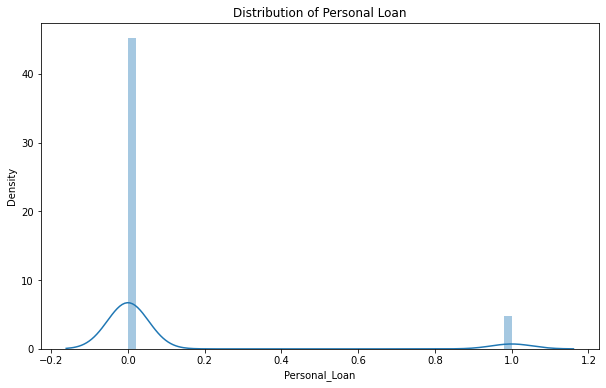

In [47]:
#distribution
plt.figure(figsize=(10,6))
sns.distplot(df.Personal_Loan)
plt.title("Distribution of Personal Loan")
plt.show()

Age  Personal_Loan
Age            1.000000      -0.007726
Personal_Loan -0.007726       1.000000

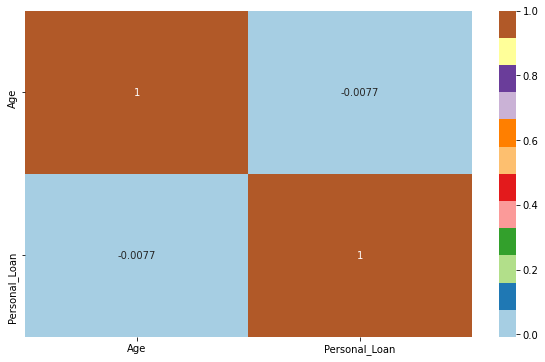

In [52]:
#heatmap all correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='Paired')
df.corr()

In [53]:
#countplot
plt.figure(figsize=(10,6))
sns.countplot(df.Personal_Loan)
plt.title("Personal Loan")
plt.show()

c:\users\bayu\opencv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


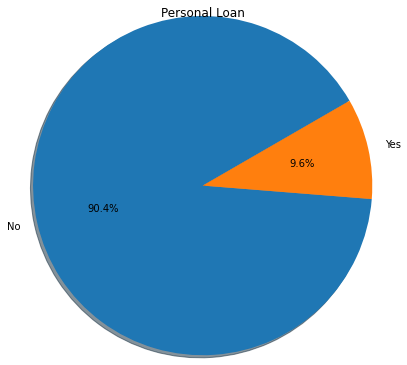

In [56]:
#pie chart
plt.figure(figsize=(10,6))
personal_loan = [np.count_nonzero(df['Personal_Loan'] == 0),
                np.count_nonzero(df['Personal_Loan'] == 1)]
activities = ['No', 'Yes']
plt.title("Personal Loan")
plt.pie(personal_loan, labels=activities, radius=1.3, startangle=30, autopct='%.1f%%', shadow=True)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Personal_Loan'>

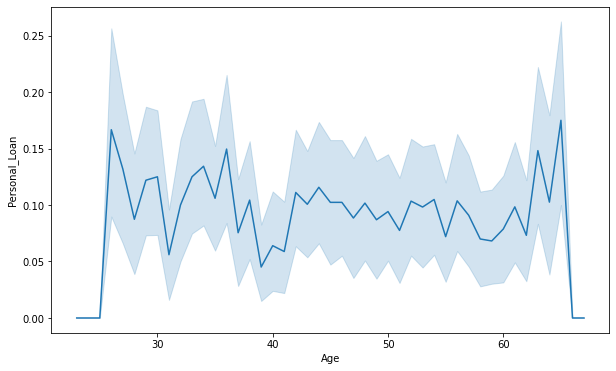

In [58]:
#lineplot
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Age', y='Personal_Loan')